In [1]:
import pandas as pd
import numpy as np
import zipfile
import os

In [2]:
zip_file_path = 'archive.zip'
extract_dir = 'british_airways_reviews'

In [3]:
os.makedirs(extract_dir, exist_ok=True)

In [4]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    
print(f'Files extracted to "{extract_dir}/" successfully.')

Files extracted to "british_airways_reviews/" successfully.


In [5]:
file_path = f'{extract_dir}/British_airways_customer_reviews.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,Unnamed: 0,name,headline,details_review,type_of_traveller,seat_type,route,date_flown,seat_comfort,wifi_connectivity,cabin_staff_service,food_beverages,inflight_entertainment,ground_service,value_for_money,recommendation
0,0,Jenine Smith (United States) 18th August 2024,"""zero response from BA to reimburse us""","\n""zero response from BA to reimburse us""\n\n\...",Family Leisure,Economy Class,NaN,July 2024,1.0,NaN,1.0,NaN,NaN,1.0,1,False
1,1,C Hayne (United Kingdom) 15th August 2024,"""no acknowledgment or resolution""","\n""no acknowledgment or resolution""\n\n\nC Hay...",Solo Leisure,Economy Class,London to Basel,June 2024,1.0,1.0,1.0,NaN,NaN,1.0,1,False
2,2,C Porter (United Kingdom) 12th August 2024,"""Outstanding service""","\n""Outstanding service"" \n\n\nC Porter (Unite...",Solo Leisure,Business Class,Vancouver to London,July 2024,5.0,NaN,5.0,5.0,5.0,4.0,4,True
3,3,39 reviews\n\n\n\nG Jones (Lebanon) 12th Augus...,"""the crew were fabulous""","\n""the crew were fabulous""\n\n\n39 reviews\n\n...",Solo Leisure,Economy Class,London to Amman,August 2024,3.0,NaN,5.0,4.0,NaN,4.0,4,True
4,4,Edward King (United States) 11th August 2024,“customer service has been horrible”,\n“customer service has been horrible”\n\n\nEd...,Family Leisure,Economy Class,Barcelona to Dallas via Heathrow,August 2024,3.0,NaN,4.0,4.0,4.0,2.0,3,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1000 non-null   int64  
 1   name                    1000 non-null   object 
 2   headline                1000 non-null   object 
 3   details_review          1000 non-null   object 
 4   type_of_traveller       998 non-null    object 
 5   seat_type               1000 non-null   object 
 6   route                   996 non-null    object 
 7   date_flown              1000 non-null   object 
 8   seat_comfort            912 non-null    float64
 9   wifi_connectivity       319 non-null    float64
 10  cabin_staff_service     903 non-null    float64
 11  food_beverages          779 non-null    float64
 12  inflight_entertainment  515 non-null    float64
 13  ground_service          943 non-null    float64
 14  value_for_money         1000 non-null   i

In [14]:
len(df.route.unique())

648

# Data Cleaning

In [15]:
# Drop the 'Unnamed: 0' column as it's just an index column
df.drop(columns=['Unnamed: 0'], inplace=True)

## Handle missing values

In [16]:
# For numerical columns, we could fill missing values with the median or mean
df['seat_comfort'].fillna(df['seat_comfort'].median(), inplace=True)
df['wifi_connectivity'].fillna(df['wifi_connectivity'].median(), inplace=True)
df['cabin_staff_service'].fillna(df['cabin_staff_service'].median(), inplace=True)
df['food_beverages'].fillna(df['food_beverages'].median(), inplace=True)
df['inflight_entertainment'].fillna(df['inflight_entertainment'].median(), inplace=True)
df['ground_service'].fillna(df['ground_service'].median(), inplace=True)

In [17]:
# For categorical columns, fill missing values with the most frequent value (mode)
df['type_of_traveller'].fillna(df['type_of_traveller'].mode()[0], inplace=True)
df['route'].fillna('Unknown', inplace=True)

# Clean up text data in 'details_review' and 'headline'
df['details_review'] = df['details_review'].str.strip()
df['headline'] = df['headline'].str.strip()

In [18]:
# Display the cleaned dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1000 non-null   object 
 1   headline                1000 non-null   object 
 2   details_review          1000 non-null   object 
 3   type_of_traveller       1000 non-null   object 
 4   seat_type               1000 non-null   object 
 5   route                   1000 non-null   object 
 6   date_flown              1000 non-null   object 
 7   seat_comfort            1000 non-null   float64
 8   wifi_connectivity       1000 non-null   float64
 9   cabin_staff_service     1000 non-null   float64
 10  food_beverages          1000 non-null   float64
 11  inflight_entertainment  1000 non-null   float64
 12  ground_service          1000 non-null   float64
 13  value_for_money         1000 non-null   int64  
 14  recommendation          1000 non-null   b

## Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

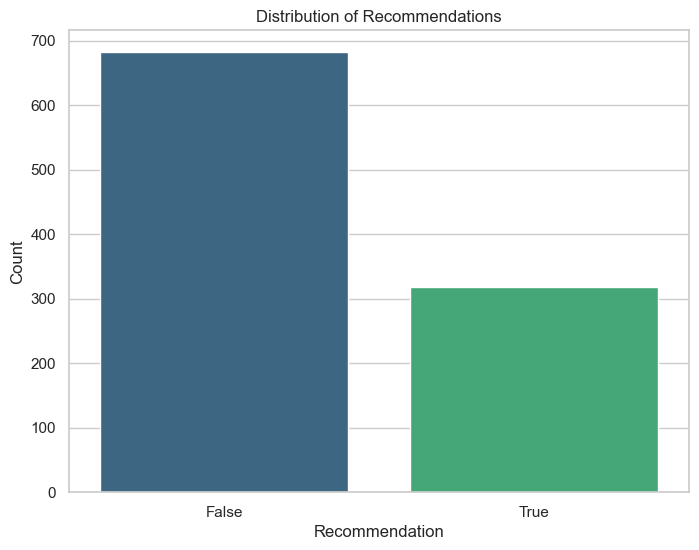

In [20]:
# Visualization 1: Distribution of Recommendations
plt.figure(figsize=(8, 6))
sns.countplot(x='recommendation', data=df, palette='viridis')
plt.title('Distribution of Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()

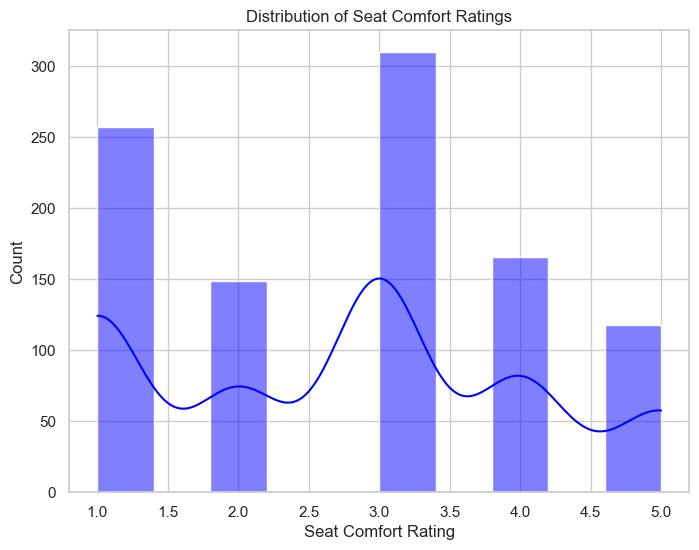

In [21]:
# Visualization 2: Distribution of Seat Comfort Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['seat_comfort'], bins=10, kde=True, color='blue')
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Count')
plt.show()

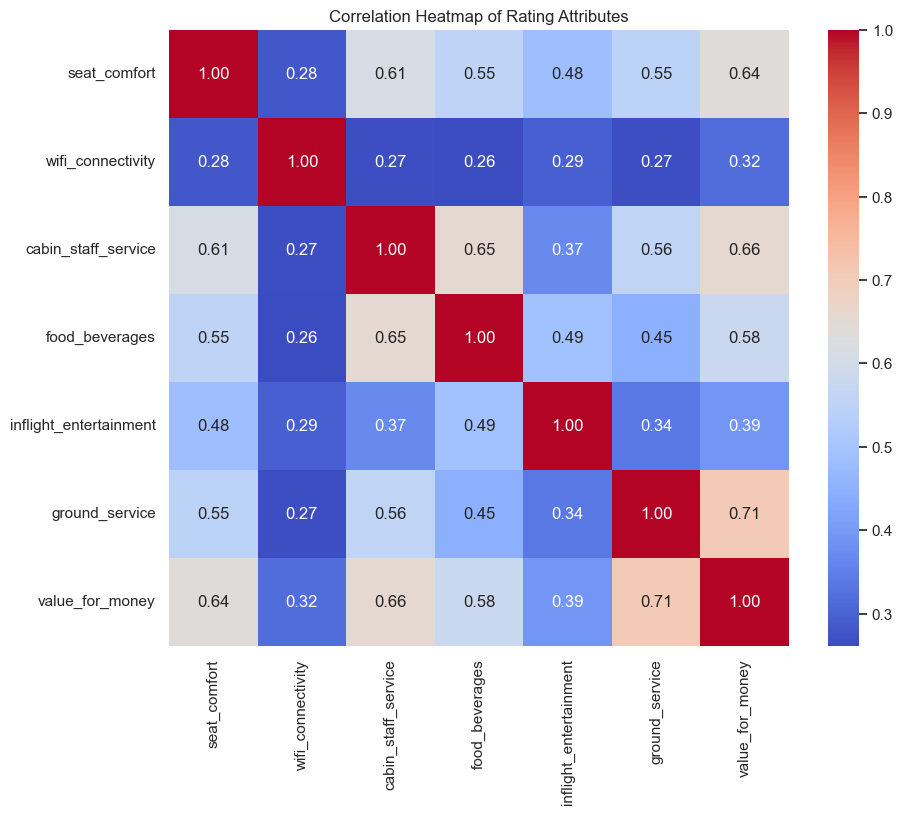

In [22]:
# Visualization 3: Correlation Heatmap of Rating Attributes
plt.figure(figsize=(10, 8))
rating_columns = ['seat_comfort', 'wifi_connectivity', 'cabin_staff_service', 
                  'food_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money']
corr = df[rating_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Rating Attributes')
plt.show()

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import string

In [24]:
# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/khalifa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khalifa/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/khalifa/nltk_data...


True

In [25]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [26]:
# Preprocess text data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    # Join tokens back into a string
    return ' '.join(tokens)

In [27]:
# Apply preprocessing to the 'details_review' column
df['cleaned_review'] = df['details_review'].apply(preprocess_text)

In [28]:
# Apply sentiment analysis using VADER
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [29]:
# Classify sentiment as positive, neutral, or negative based on the compound score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral'))

# Display the first few rows with the new sentiment columns
df[['details_review', 'cleaned_review', 'sentiment_score', 'sentiment']].head()

,details_review,cleaned_review,sentiment_score,sentiment
0,"""zero response from BA to reimburse us""\n\n\nJ...",zero response ba reimburse us jenine smith uni...,0.6365,positive
1,"""no acknowledgment or resolution""\n\n\nC Hayne...",acknowledgment resolution c hayne united kingd...,-0.1405,negative
2,"""Outstanding service"" \n\n\nC Porter (United ...",outstanding service c porter united kingdom au...,0.9901,positive
3,"""the crew were fabulous""\n\n\n39 reviews\n\n\n...",crew fabulous reviews g jones lebanon august t...,0.9957,positive
4,“customer service has been horrible”\n\n\nEdwa...,customer service horrible edward king united s...,0.4141,positive


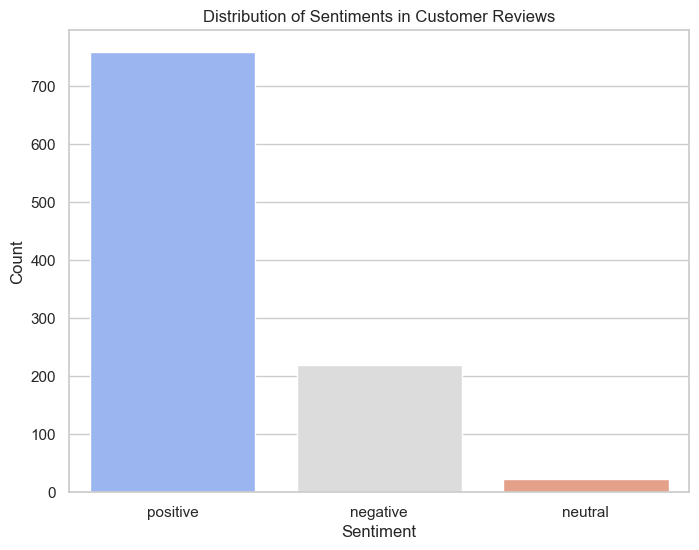

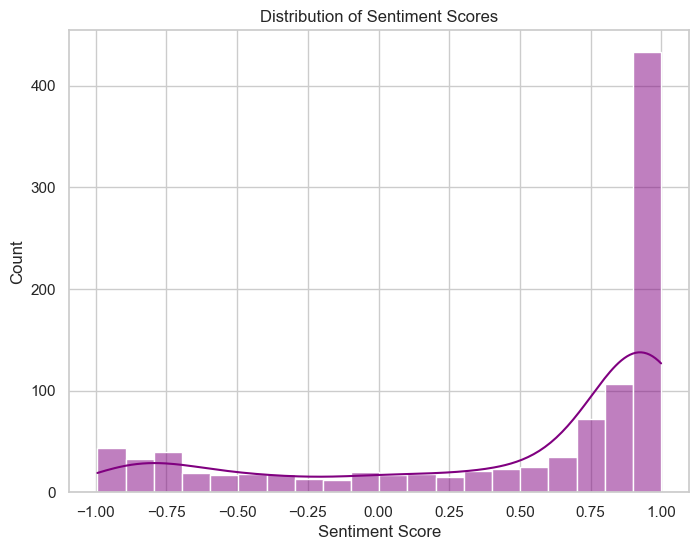

In [30]:
# Visualization: Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments in Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization: Sentiment Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()



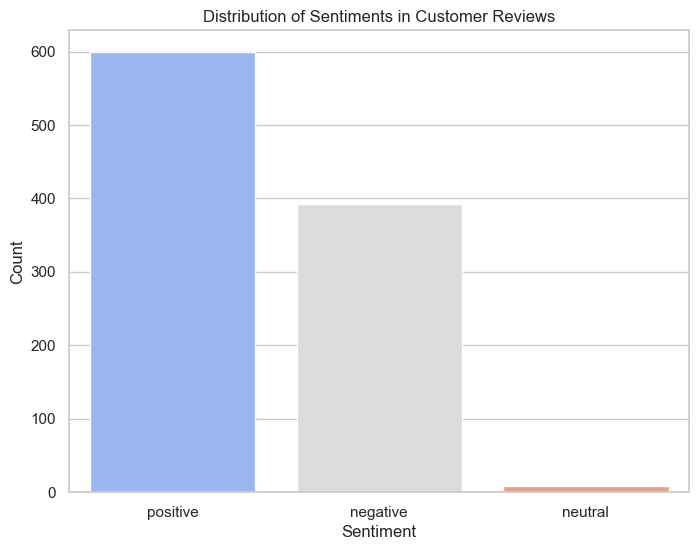

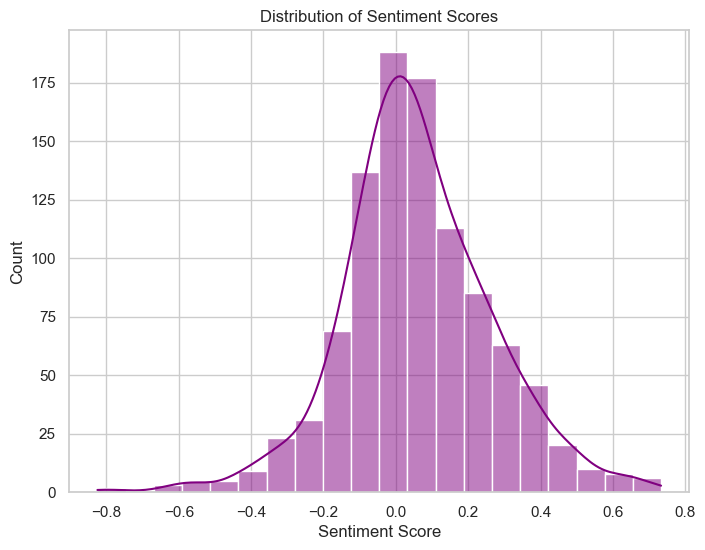

In [31]:
from textblob import TextBlob

# Apply sentiment analysis using TextBlob
df['sentiment_score'] = df['details_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, neutral, or negative based on the polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Visualization: Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments in Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization: Sentiment Scores Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


In [36]:
# Calculate the frequency of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Display the most common sentiments
sentiment_counts

positive    599
negative    392
neutral       9
Name: sentiment, dtype: int64

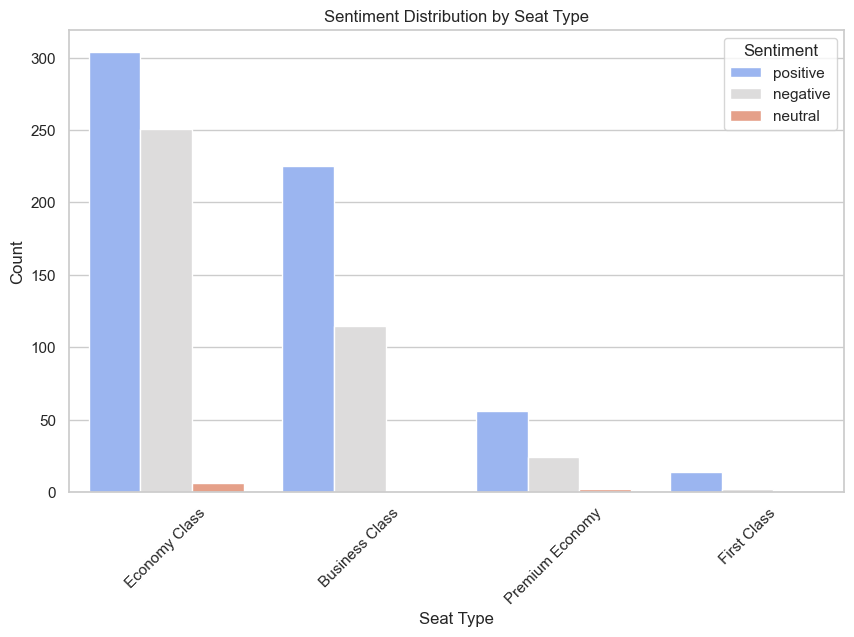

In [32]:
# Visualization: Sentiment Distribution by Seat Type
plt.figure(figsize=(10, 6))
sns.countplot(x='seat_type', hue='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Count the number of negative sentiments by traveler type to determine which group has the most issues
issues_by_traveler_type = df[df['sentiment'] == 'negative']['type_of_traveller'].value_counts()

# Display the results
issues_by_traveler_type

Couple Leisure    130
Solo Leisure      111
Business           81
Family Leisure     70
Name: type_of_traveller, dtype: int64

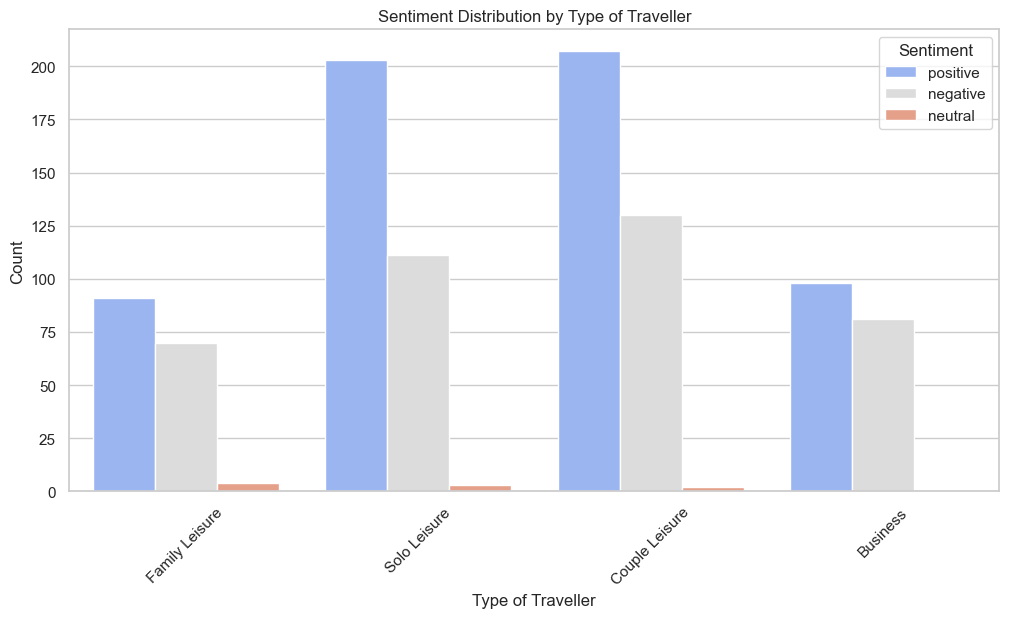

In [33]:
# Visualization: Sentiment Distribution by Type of Traveller
plt.figure(figsize=(12, 6))
sns.countplot(x='type_of_traveller', hue='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

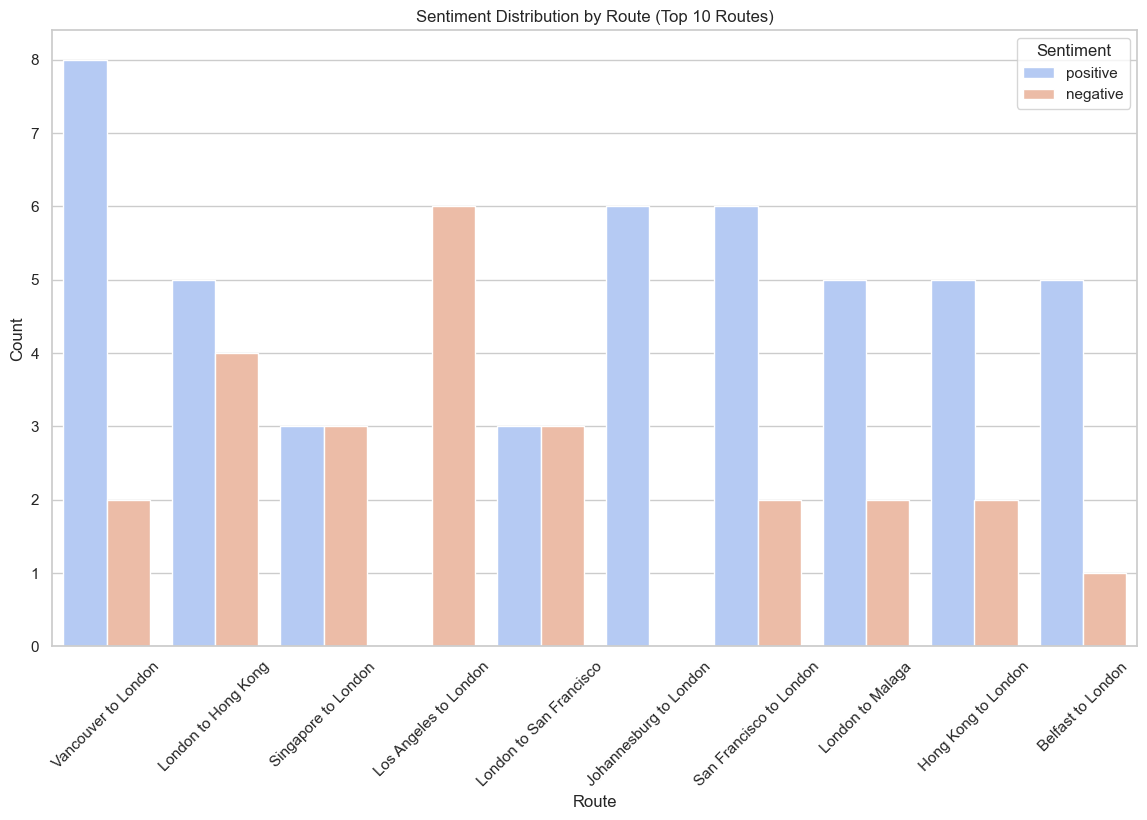

In [34]:
# Due to potentially large number of routes, we'll focus on the top routes with the most reviews

# Identify the top 10 routes with the most reviews
top_routes = df['route'].value_counts().head(10).index

# Filter the dataframe to include only the top routes
filtered_df = df[df['route'].isin(top_routes)]

# Visualization: Sentiment Distribution by Route
plt.figure(figsize=(14, 8))
sns.countplot(x='route', hue='sentiment', data=filtered_df, palette='coolwarm')
plt.title('Sentiment Distribution by Route (Top 10 Routes)')
plt.xlabel('Route')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

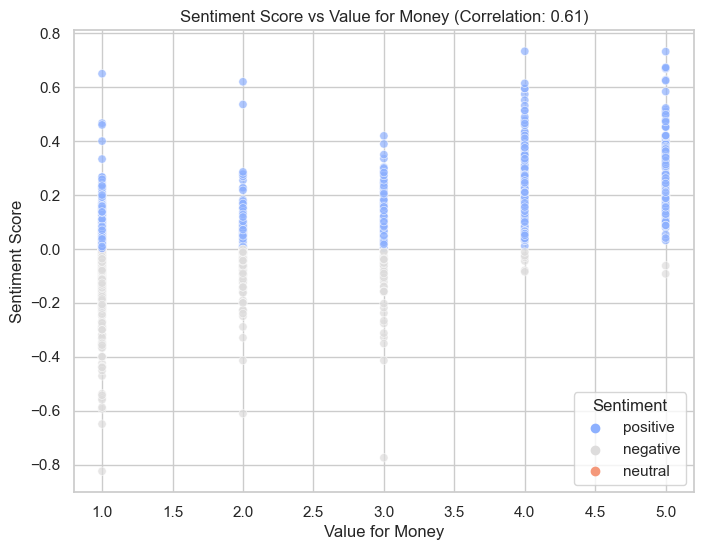

0.6105600084649037

In [35]:
# Correlation between sentiment score and value for money
correlation = df['sentiment_score'].corr(df['value_for_money'])

# Visualization: Scatter plot of Sentiment Score vs Value for Money
plt.figure(figsize=(8, 6))
sns.scatterplot(x='value_for_money', y='sentiment_score', data=df, hue='sentiment', palette='coolwarm', alpha=0.7)
plt.title(f'Sentiment Score vs Value for Money (Correlation: {correlation:.2f})')
plt.xlabel('Value for Money')
plt.ylabel('Sentiment Score')
plt.legend(title='Sentiment')
plt.show()

correlation


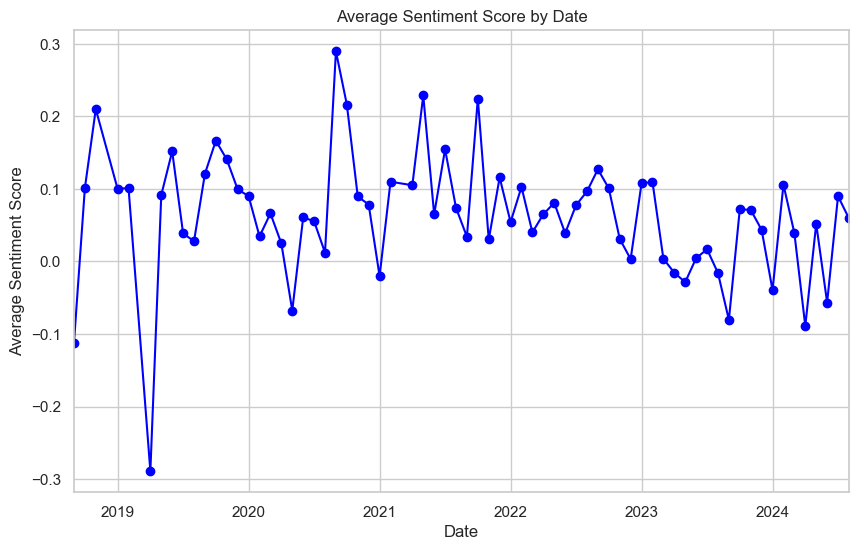

In [37]:
# Convert the 'date_flown' column to datetime format for easier analysis
df['date_flown'] = pd.to_datetime(df['date_flown'], format='%B %Y', errors='coerce')

# Group the data by month and year, and calculate the average sentiment score
sentiment_by_date = df.groupby(df['date_flown'].dt.to_period("M"))['sentiment_score'].mean()

# Visualization: Average Sentiment Score by Date
plt.figure(figsize=(10, 6))
sentiment_by_date.plot(kind='line', marker='o', color='blue')
plt.title('Average Sentiment Score by Date')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

In [39]:
# Filter the dataset to include only reviews from Couple Leisure travelers with negative sentiments
couple_issues_df = df[(df['type_of_traveller'] == 'Couple Leisure') & (df['sentiment'] == 'negative')]

# Display the top issues by analyzing the most common words in the 'details_review' column
from collections import Counter
import re

# Combine all reviews into a single string
all_reviews = ' '.join(couple_issues_df['details_review'])

# Remove punctuation and tokenize the words
words = re.findall(r'\b\w+\b', all_reviews.lower())

# Remove common stopwords
stopwords_set = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stopwords_set]

# Count the most common words
word_freq = Counter(filtered_words)

# Display the 20 most common words to get a sense of the top issues
most_common_issues = word_freq.most_common(20)
most_common_issues

[('12345', 704),
 ('service', 345),
 ('seat', 314),
 ('flight', 238),
 ('class', 193),
 ('staff', 169),
 ('food', 167),
 ('ba', 162),
 ('cabin', 149),
 ('money', 143),
 ('london', 142),
 ('ground', 136),
 ('date', 135),
 ('verified', 132),
 ('type', 131),
 ('value', 131),
 ('travellercouple', 129),
 ('leisure', 129),
 ('comfort', 124),
 ('recommendedno', 118)]

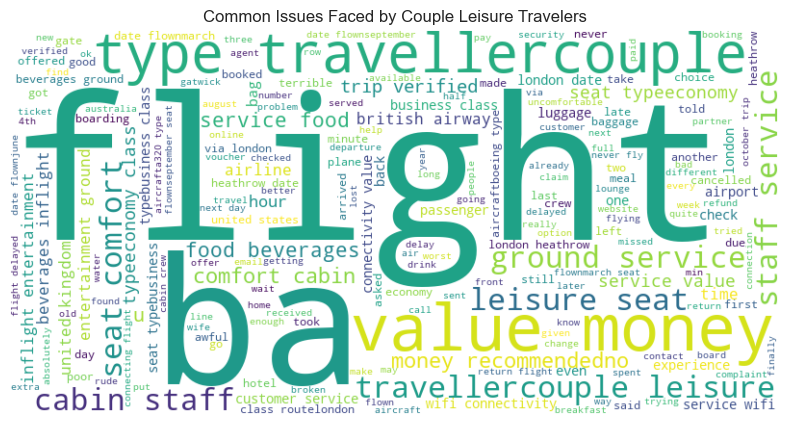

In [40]:
from wordcloud import WordCloud

# Generate a word cloud for the filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Issues Faced by Couple Leisure Travelers')
plt.show()


## Model Training

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
# Convert the review text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X = tfidf_vectorizer.fit_transform(df['details_review']).toarray()
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict sentiment on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.53      0.64        78
     neutral       0.00      0.00      0.00         2
    positive       0.74      0.92      0.82       120

    accuracy                           0.76       200
   macro avg       0.51      0.48      0.48       200
weighted avg       0.76      0.76      0.74       200



/Users/khalifa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khalifa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/khalifa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Number of folds for cross-validation
cv_folds = 5

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='accuracy')

# Predict using cross-validation
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv_folds)

# Calculate precision, recall, and F1-score
cv_precision = precision_score(y_train, y_pred_cv, average='weighted')
cv_recall = recall_score(y_train, y_pred_cv, average='weighted')
cv_f1 = f1_score(y_train, y_pred_cv, average='weighted')

# Output the cross-validation metrics
print(f"Cross-Validation Accuracy (mean of {cv_folds} folds): {cv_accuracy.mean():.2f}")
print(f"Cross-Validation Precision: {cv_precision:.2f}")
print(f"Cross-Validation Recall: {cv_recall:.2f}")
print(f"Cross-Validation F1-Score: {cv_f1:.2f}")

Cross-Validation Accuracy (mean of 5 folds): 0.74
Cross-Validation Precision: 0.73
Cross-Validation Recall: 0.74
Cross-Validation F1-Score: 0.72


/Users/khalifa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
ensemble_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model.fit(X_train, y_train)

# Predict and evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")

Ensemble Model Accuracy: 0.72


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Initialize the Random Forest model
ensemble_model = RandomForestClassifier(random_state=42)

# Define an expanded parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [2, 4, 6, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


In [58]:
# GridSearchCV
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best GridSearchCV Parameters: {grid_search.best_params_}")

Best GridSearchCV Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 8, 'n_estimators': 100}


In [ ]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ensemble_model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)
print(f"Best RandomizedSearchCV Parameters: {random_search.best_params_}")